<a href="https://colab.research.google.com/github/paragnayak/Data-Science/blob/master/Loan_Prediction_Mukul_Sir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Problem Statement

About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Framing The Hypothesis

1) Credit Score

2) Income-Credited In Bank Account

3) Recent Transactions List

4) Salaried/Self-Employed

5) Networth

6) Industry-Govt or Private Sector

7) Age of the Applicant

8) Gurantor

9) Loan Amount

10) Education

11) Marital Status

12) Type Of Loan

13) Gender

14) Tenure of the Loan and ROI

15) Regions

16) Existing Loans and loan balance

In [0]:
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Loan Prediction/train_ctrUa4K.csv')

In [0]:
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning Classification/Loan Prediction/test_lAUu6dG.csv')

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploring the Dataset

In [6]:
print('The Total Rows are ', train.shape[0],'in train set and',test.shape[0],'in test set')
print('The Total Columns are ', train.shape[1],'in train set and',test.shape[1],'in test set')

The Total Rows are  614 in train set and 367 in test set
The Total Columns are  13 in train set and 12 in test set


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


# Univariate Analysis

In [8]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

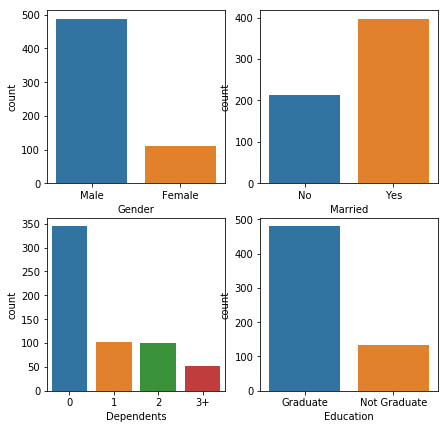

In [9]:
# Independent variables and categorical
plt.figure(1)
plt.figure(figsize=[7,7])
plt.subplot(221) # PLot address 221
sns.countplot(train.Gender)
plt.subplot(222) # PLot address 222
sns.countplot(train.Married)
plt.subplot(223) # PLot address 223
sns.countplot(train.Dependents)
plt.subplot(224) # PLot address 224
sns.countplot(train.Education)

plt.show()

## Observations

1) More Males in comparison to Females i.e. 81% are males and 19% are females.


2) Married People count is more in comparison to Bachelors/Spinsters. 65% if them are married and 35% of them are unmarried.

3) In dependents, The count of 0 is more. 57% of them dont have kids

4) The Level of Education is Higher. 78% of them are graduates

5) 14% People are Self-Employed  whereas 86% arent

6) 84% people have 1s and 16% people have 0s

7) 38% are semi_Urban,33% are URban and 29% are Rural


In [10]:
#ratio of females vs males
train.Gender.value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [11]:
train.Married.value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [12]:
train.Dependents.value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [13]:
train.Education.value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

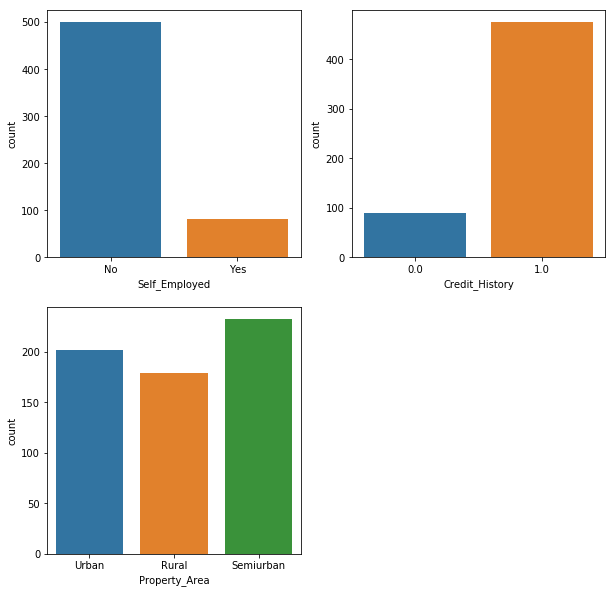

In [14]:
# Independent Categorical Variables
plt.figure(figsize=[10,10])
plt.subplot(221)
sns.countplot(train.Self_Employed)
plt.subplot(222)
sns.countplot(train.Credit_History)
plt.subplot(223)
sns.countplot(train.Property_Area)
plt.show()

In [15]:
train.Self_Employed.value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [16]:
train.Property_Area.value_counts(normalize=True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

In [17]:
train.Credit_History.value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

<Figure size 432x288 with 0 Axes>

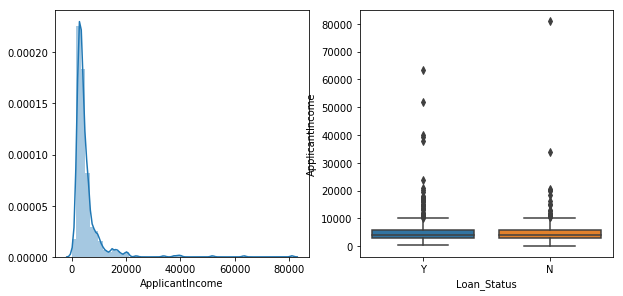

In [18]:
# Applicant Income
plt.figure(1)
plt.figure(figsize=[10,10])
plt.subplot(221)
sns.distplot(train.ApplicantIncome)
#plt.title('Distplot: Applicant Income')

plt.subplot(222)
sns.boxplot(y=train.ApplicantIncome,x=train.Loan_Status)
#plt.title('Applicant Income Boxplot')
plt.show()

In [19]:

train.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

# Observation

Applicant Income appears to be skewed in nature and then can be log transformed to bring it in the normal state.

The Boxplot in the other side explains the existence of the outlier in the income. This shows that there is disparity in the income in society

<Figure size 432x288 with 0 Axes>

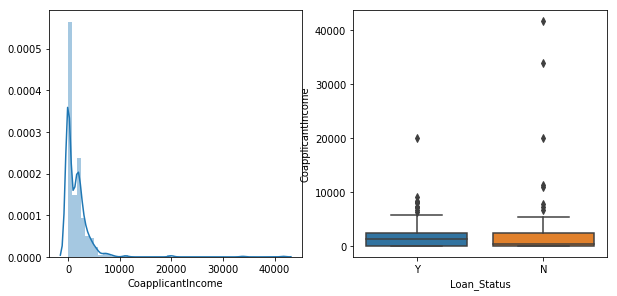

In [20]:
# CoApplicant Income
plt.figure(1)
plt.figure(figsize=[10,10])
plt.subplot(221)
sns.distplot(train.CoapplicantIncome)
#plt.title('Distplot: Applicant Income')

plt.subplot(222)
sns.boxplot(y=train.CoapplicantIncome,x=train.Loan_Status)
#plt.title('Applicant Income Boxplot')
plt.show()

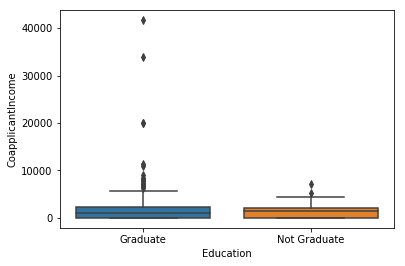

In [21]:
# education
sns.boxplot(y=train.CoapplicantIncome,x=train.Education)
#train.boxplot(column="ApplicantIncome", by='Education')
#plt.suptitle(" ")
plt.show()

In [24]:
train.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

# Observations

Graduates are commanding a better pay packet in comparison to Non Grads

majority of co applicants income is of 5K


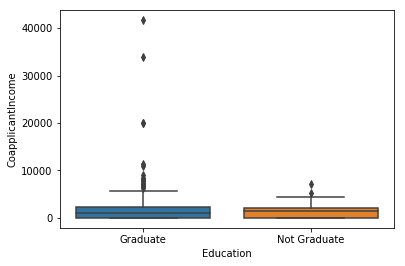

In [25]:
sns.boxplot(y=train.CoapplicantIncome,x=train.Education)
#train.boxplot(column="ApplicantIncome", by='Education')
#plt.suptitle(" ")
plt.show()

# Bi Variate Analysis

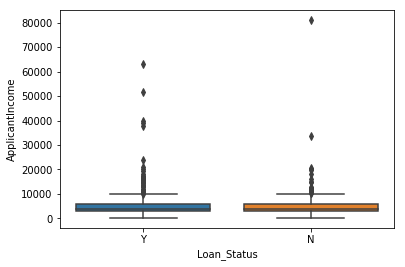

In [26]:
# Applicant Income vs Loan status
sns.boxplot(x=train.Loan_Status,y=train.ApplicantIncome)
plt.show()

Good Acceptance Score for High Income group in comparison to low income


<Figure size 432x288 with 0 Axes>

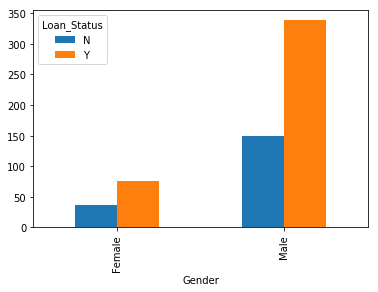

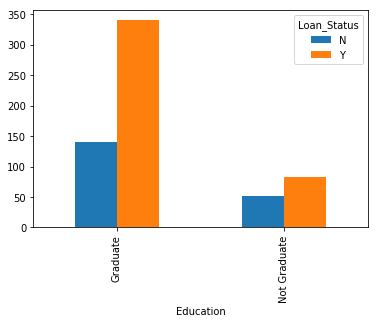

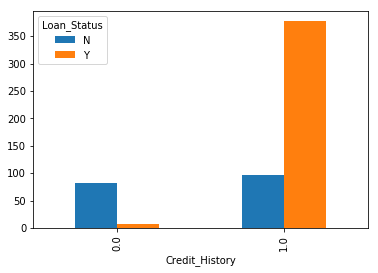

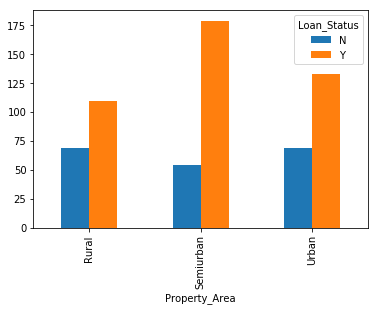

In [27]:
plt.figure(1)

gender=pd.crosstab(train.Gender,train.Loan_Status)
gender.plot(kind='bar')


edu=pd.crosstab(train.Education,train.Loan_Status)
edu.plot(kind='bar')

cred=pd.crosstab(train.Credit_History,train.Loan_Status)
cred.plot(kind='bar')

prop=pd.crosstab(train.Property_Area,train.Loan_Status)
prop.plot(kind='bar')

plt.show()

# Observations  Gender Vs Loan Status

1) Males get more loans in comparison to females

2) Graduates get more loans then Non grads

3) High Loan Frequency for the people having Credit History of 1.0

4) Priority of disbursal of loan is more on Semi-Urban and then Urban...


In [28]:
# Dependents
train.Dependents.value_counts() # Rectify 3+ to 3

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [0]:

train.Dependents.replace(to_replace='3+',value=3,inplace=True)

In [30]:
train.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [0]:
# # finding the co-relation
correls=train.corr()

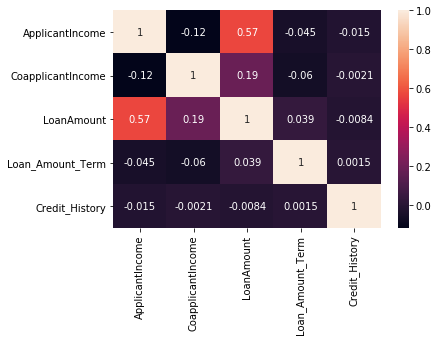

In [32]:

sns.heatmap(correls,annot=True)

Correlations found out between Loan Amount and Applicant Income[0.57]

Also found the corelatrion between Loan Amount and Co-Applicant Income [0.19]

# Numerical Variables

In [33]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [0]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)
train.Credit_History.fillna(train.Credit_History.mode()[0],inplace=True)
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0],inplace=True)
train.LoanAmount.fillna(128,inplace=True)

In [0]:
test.Gender.fillna(test.Gender.mode()[0],inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0],inplace=True)
test.Self_Employed.fillna(test.Self_Employed.mode()[0],inplace=True)
test.Credit_History.fillna(test.Credit_History.mode()[0],inplace=True)
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0],inplace=True)
test.LoanAmount.fillna(125,inplace=True)

In [37]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Exploratory Data Analysis

In [39]:
# Checking for the unique values 
train.nunique() 

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

## Observations

As we can see that the loan_id does not contain any duplicate values.


In [0]:
def loan_stats(x):
  if (x=='Y'):
    return (1)
  else:
    return(0)

In [0]:
train['Loan_Status']=train.Loan_Status.apply(loan_stats)

## Feature Engineering

1) Creating a new column EMI

In [0]:
train['EMI']=round((train.LoanAmount*1000)/train.Loan_Amount_Term,2)

In [43]:
train['EMI']

0       355.56
1       355.56
2       183.33
3       333.33
4       391.67
5       741.67
6       263.89
7       438.89
8       466.67
9       969.44
10      194.44
11      302.78
12      555.56
13      316.67
14      141.67
15      347.22
16      416.67
17      211.11
18      369.44
19      319.44
20      288.89
21      875.00
22      322.22
23      311.11
24      419.44
25      530.56
26      338.89
27      305.56
28       97.22
29      333.33
        ...   
584     405.56
585    2047.62
586     288.89
587     194.44
588     261.11
589     294.44
590     311.11
591     854.17
592     811.11
593     788.89
594     722.22
595     305.56
596     519.44
597     244.44
598     500.00
599     533.33
600    1944.44
601     430.56
602     355.56
603     477.78
604    1377.78
605     711.11
606     480.56
607     436.11
608     300.00
609     197.22
610     222.22
611     702.78
612     519.44
613     369.44
Name: EMI, Length: 614, dtype: float64

<function matplotlib.pyplot.show>

<Figure size 432x288 with 0 Axes>

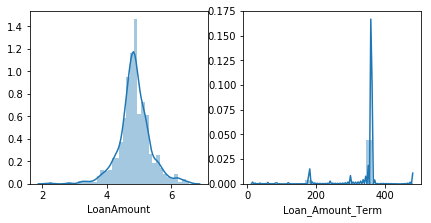

In [44]:
plt.figure(1)
plt.figure(figsize=[7,7])
plt.subplot(221)
sns.distplot(np.log(train.LoanAmount))

plt.subplot(222)
sns.distplot(train.Loan_Amount_Term)
plt.show

In [0]:
# Transformation of loan amount
train['LoanAmount_log']=np.log(train.LoanAmount)

In [0]:
# Transformation of EMI
train['EMI_log']=np.log(train.EMI)

In [0]:
# Total Income
train['TotalIncome']=train.ApplicantIncome+train.CoapplicantIncome

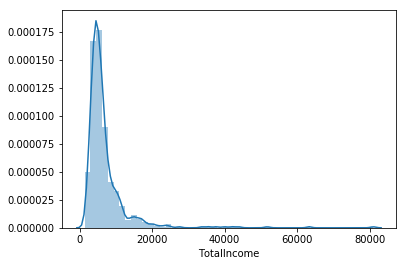

In [48]:
sns.distplot(train.TotalIncome)

In [0]:

train['TotalIncome_log']=np.log(train.TotalIncome)

In [50]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,EMI,LoanAmount_log,EMI_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,355.56,4.852030,5.873694,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,355.56,4.852030,5.873694,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,183.33,4.189655,5.211288,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,333.33,4.787492,5.809133,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,391.67,4.948760,5.970420,6000.0,8.699515


In [51]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [0]:
test['EMI']=round((test.LoanAmount*1000)/test.Loan_Amount_Term,2)

In [0]:
test['EMI_log']=np.log(test.EMI)

In [0]:

test['TotalIncome']=test.ApplicantIncome+test.CoapplicantIncome

In [0]:
test['TotalIncome_log']=np.log(test.TotalIncome)

In [0]:
test['LoanAmount_log']=np.log(test.LoanAmount)

In [0]:
test.Dependents.replace(to_replace='3+',value=3,inplace=True)

In [58]:
train.shape

(614, 18)

In [59]:
test.shape

(367, 17)

In [60]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'EMI', 'LoanAmount_log', 'EMI_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [61]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'EMI', 'EMI_log',
       'TotalIncome', 'TotalIncome_log', 'LoanAmount_log'],
      dtype='object')

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc=StandardScaler()

In [0]:
newtrain=train.drop(['ApplicantIncome', 'CoapplicantIncome',"Loan_ID",'LoanAmount','Loan_Status','EMI', 'TotalIncome'],axis=1)

In [0]:

newtest=test.drop(['ApplicantIncome', 'CoapplicantIncome',"Loan_ID",'LoanAmount','EMI', 'TotalIncome'],axis=1)

In [66]:
newtrain.columns.value_counts().sum()

11

In [67]:
newtest.columns.value_counts().sum()

11

In [0]:
#One Hot Encoding
dummytrain=pd.get_dummies(newtrain)
dummytest=pd.get_dummies(newtest)

In [69]:
dummytest.shape

(367, 20)

In [70]:
dummytrain.shape

(614, 20)

In [0]:
#Scaling

sc=StandardScaler()
scaled_train=pd.DataFrame(sc.fit_transform(dummytrain),columns=dummytrain.columns)

In [0]:
scaled_test=pd.DataFrame(sc.fit_transform(dummytest),columns=dummytest.columns)

# Decision Tree With Criterion Entropy

In [0]:

from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree=DecisionTreeClassifier(criterion='entropy')

In [0]:
pred_tree=dtree.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:

predlist=[]
for i in range(0,len(pred_tree)):
  if (pred_tree[i]==1):
    predlist.append('Y')
  else:
    predlist.append('N')

In [0]:
# Submission
#solution=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist})

In [0]:
# from google.colab import files
# solution.to_csv('DT.csv',index=False)    # 0.680555555555556  0.631944444444444 accuracy with more columns removed
# files.download('DT.csv')

# Decision Tree With Criterion Gini

In [0]:
dtreeg=DecisionTreeClassifier(criterion='gini')

In [0]:
pred_tree1=dtreeg.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist=[]
for i in range(0,len(pred_tree1)):
   if (pred_tree1[i]==1):
      predlist.append('Y')
   else:
      predlist.append('N')

In [0]:
# Submission
# solution=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist})

In [0]:
#from google.colab import files
#solution.to_csv('DTG.csv',index=False)    # 0.6458333333333334 
#files.download('DTG.csv')

# RAndom Forrest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc=RandomForestClassifier()

In [0]:
pred_rf=rfc.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_rf=[]
for i in range(0,len(pred_rf)):
  if (pred_rf[i]==1):
    predlist_rf.append('Y')
  else:
    predlist_rf.append('N')

In [0]:
#solution_rf=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_rf})

In [0]:
#from google.colab import files
#solution_rf.to_csv('RF.csv',index=False)    # 0.6875.
#files.download('RF.csv')

# Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB


In [0]:
gb=GaussianNB()

In [0]:
pred_gb=gb.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_gb=[]
for i in range(0,len(pred_gb)):
  if (pred_gb[i]==1):
    predlist_gb.append('Y')
  else:
    predlist_gb.append('N')

In [0]:
#solution_gb=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_gb})

In [0]:
#from google.colab import files
#solution_gb.to_csv('GB.csv',index=False)    # 0.784722222222222 
#files.download('GB.csv')

# K Nearest Neighbors

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
knn=KNeighborsClassifier()

In [0]:
pred_knn=knn.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_knn=[]
for i in range(0,len(pred_knn)):
  if (pred_knn[i]==1):
    predlist_knn.append('Y')
  else:
    predlist_knn.append('N')

In [0]:
#solution_knn=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_knn})

In [0]:
#from google.colab import files
#solution_knn.to_csv('KNN.csv',index=False)    # 0.701388888888889
#files.download('KNN.csv')

# Ensemble Techniques

# Bagging Classifier

In [0]:
from sklearn.ensemble import BaggingClassifier

In [0]:
bgc=BaggingClassifier()

In [0]:
pred_bgc=bgc.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_bgc=[]
for i in range(0,len(pred_bgc)):
  if (pred_bgc[i]==1):
    predlist_bgc.append('Y')
  else:
    predlist_bgc.append('N')

In [0]:
#solution_bgc=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_bgc})

In [0]:
#from google.colab import files
#solution_bgc.to_csv('BGC.csv',index=False)    #  0.7152777777777778
#files.download('BGC.csv')

# Ada Boost Classifier

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
abc=AdaBoostClassifier()

In [0]:
pred_abc=abc.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_abc=[]
for i in range(0,len(pred_abc)):
  if (pred_abc[i]==1):
    predlist_abc.append('Y')
  else:
    predlist_abc.append('N')

In [0]:
#solution_abc=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_abc})

In [0]:

#from google.colab import files
#solution_abc.to_csv('ABC.csv',index=False)    #  0.7291666666666666
#files.download('ABC.csv')

# Gradient Boosting classifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
gbc=GradientBoostingClassifier()

In [0]:
pred_gbc=gbc.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_gbc=[]
for i in range(0,len(pred_gbc)):
  if (pred_gbc[i]==1):
    predlist_gbc.append('Y')
  else:
    predlist_gbc.append('N')

In [0]:
#solution_gbc=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_gbc})

In [0]:
#from google.colab import files
#solution_gbc.to_csv('GBC.csv',index=False)    #  0.7638888888888888.
#files.download('GBC.csv')

# Using Ramdomized Search and Grid Search 

In [0]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [122]:
# Randomized Search for Decision Tree
param={'criterion':['entropy','gini'],'max_depth':np.arange(1,10)}
R=RandomizedSearchCV(dtree,param,cv=5,scoring='accuracy') 
print(R.fit(scaled_train,train.Loan_Status).predict(scaled_test))

[1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1]


In [123]:
R.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [0]:
dtree1=DecisionTreeClassifier(criterion='entropy',max_depth=1)

In [0]:
pred_dtree1=dtree1.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_dtree1=[]
for i in range(0,len(pred_dtree1)):
  if (pred_dtree1[i]==1):
    predlist_dtree1.append('Y')
  else:
    predlist_dtree1.append('N')

In [0]:
#solution_dtree1=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_dtree1})

In [0]:
#from google.colab import files
#solution_dtree1.to_csv('DTR.csv',index=False)    #   0.7777777777777778.
#files.download('DTR.csv')

In [129]:
# Randomized Search for Random Forrest
param={'criterion':['entropy','gini'],'max_depth':np.arange(1,20),'n_estimators':np.arange(1,50),'max_features':['auto', 'sqrt']}
R1=RandomizedSearchCV(rfc,param,cv=5,scoring='accuracy') 
print(R1.fit(scaled_train,train.Loan_Status).predict(scaled_test))

[1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [130]:
R1.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 27}

In [0]:
rfc1=RandomForestClassifier(criterion='entropy',max_depth=5,max_features='sqrt',n_estimators=34)

In [0]:
pred_rfc1=rfc1.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_rfc1=[]
for i in range(0,len(pred_rfc1)):
  if (pred_rfc1[i]==1):
    predlist_rfc1.append('Y')
  else:
    predlist_rfc1.append('N')

In [0]:
#solution_rfc1=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_rfc1})

In [0]:
#from google.colab import files
#solution_rfc1.to_csv('RFR.csv',index=False)    #   0.7777777777777778.
#files.download('RFR.csv')

In [136]:
# Randomized Search for KNN
param={'n_neighbors':np.arange(1,10),'weights':['uniform','distance'],'leaf_size':[1,2,3,5],'algorithm':['auto', 'ball_tree','kd_tree','brute']}
R2=RandomizedSearchCV(knn,param,cv=5,scoring='accuracy') 
print(R2.fit(scaled_train,train.Loan_Status).predict(scaled_test))

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [137]:
R2.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 5,
 'n_neighbors': 9,
 'weights': 'distance'}

In [0]:
knn1=KNeighborsClassifier(algorithm='auto',leaf_size=2,n_neighbors=8,weights='distance')

In [0]:
pred_knn1=knn1.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_knn1=[]
for i in range(0,len(pred_knn1)):
  if (pred_knn1[i]==1):
    predlist_knn1.append('Y')
  else:
    predlist_knn1.append('N')

In [0]:
#solution_knn1=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_knn1})

In [0]:
#from google.colab import files
#solution_knn1.to_csv('KNNR.csv',index=False)    # 0.6875.
#files.download('KNNR.csv')

In [143]:
# Randomized Search for Bagging Classifier
param={'n_estimators':np.arange(1,25),'max_samples':np.arange(1,25)}
R3=RandomizedSearchCV(bgc,param,cv=5,scoring='accuracy') 
print(R3.fit(scaled_train,train.Loan_Status).predict(scaled_test))

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1]


In [144]:
R3.best_params_

{'max_samples': 10, 'n_estimators': 24}

In [0]:
  bgc1=BaggingClassifier(max_samples=13,n_estimators=18)

In [0]:
pred_bgc1=bgc1.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_bgc1=[]
for i in range(0,len(pred_bgc1)):
  if (pred_bgc1[i]==1):
    predlist_bgc1.append('Y')
  else:
    predlist_bgc1.append('N')

In [0]:
#solution_bgc1=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_bgc1})

In [0]:
#from google.colab import files
#solution_bgc1.to_csv('BGCR.csv',index=False)    #0.7152777777777778.
#files.download('BGCR.csv')

In [150]:
# Randomized Search for Adaboost Classifier
param={'n_estimators':np.arange(1,50),'learning_rate':[.001,0.01,0.1,0.25,0.5,0.75,1.0]}
R4=RandomizedSearchCV(abc,param,cv=5,scoring='accuracy') 
print(R4.fit(scaled_train,train.Loan_Status).predict(scaled_test))

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [151]:
R4.best_params_

{'learning_rate': 0.001, 'n_estimators': 46}

In [0]:
abc1=AdaBoostClassifier(learning_rate=0.01,n_estimators=36)

In [0]:
pred_abc1=abc1.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_abc1=[]
for i in range(0,len(pred_abc1)):
  if (pred_abc1[i]==1):
    predlist_abc1.append('Y')
  else:
    predlist_abc1.append('N')

In [0]:
#solution_abc1=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_abc1})

In [0]:
#from google.colab import files
#solution_abc1.to_csv('ABCR.csv',index=False)    #0.7777777777777778.
#files.download('ABCR.csv')

In [157]:
# Randomized Search for Gradient Boosting Classifier
param={'n_estimators':np.arange(1,50),'learning_rate':[.001,0.01,0.1,0.25,0.5,0.75,1.0],'max_depth':np.arange(1,25),'max_features':np.arange(1,10)}
R5=RandomizedSearchCV(gbc,param,cv=5,scoring='accuracy') 
print(R5.fit(scaled_train,train.Loan_Status).predict(scaled_test))

[1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1]


In [158]:
R5.best_params_

{'learning_rate': 0.25, 'max_depth': 20, 'max_features': 4, 'n_estimators': 46}

In [0]:
gbc1=GradientBoostingClassifier(learning_rate=0.1,max_depth=15,max_features=4,n_estimators=40)

In [0]:
pred_gbc1=gbc1.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_gbc1=[]
for i in range(0,len(pred_gbc1)):
  if (pred_gbc1[i]==1):
    predlist_gbc1.append('Y')
  else:
    predlist_gbc1.append('N')

In [0]:
#solution_gbc1=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_gbc1})

In [0]:
#from google.colab import files
#solution_gbc1.to_csv('GBCR.csv',index=False)    #0.7291666666666666.
#files.download('GBCR.csv')

In [164]:
# Grid Search for Random Forrest
param={'criterion':['entropy','gini'],'max_depth':np.arange(1,20),'n_estimators':np.arange(1,50),'max_features':['auto', 'sqrt']}
G=GridSearchCV(rfc,param,cv=5,scoring='accuracy') 
print(G.fit(scaled_train,train.Loan_Status).predict(scaled_test))

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [165]:
G.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 22}

In [0]:
rfcg=RandomForestClassifier(criterion='entropy',max_depth=4,max_features='auto',n_estimators=46)

In [0]:
pred_rfcg=rfcg.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_rfcg=[]
for i in range(0,len(pred_rfcg)):
  if (pred_rfcg[i]==1):
    predlist_rfcg.append('Y')
  else:
    predlist_rfcg.append('N')

In [0]:
#solution_rfcg=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_rfcg})

In [0]:
#from google.colab import files
#solution_rfcg.to_csv('RFCG.csv',index=False)    #0.7708333333333334
#files.download('RFCG.csv')

In [172]:
# Grid Search for KNN
param={'n_neighbors':np.arange(1,10),'weights':['uniform','distance'],'leaf_size':[1,2,3,5],'algorithm':['auto', 'ball_tree','kd_tree','brute']}
G1=GridSearchCV(knn,param,cv=5,scoring='accuracy') 
print(G1.fit(scaled_train,train.Loan_Status).predict(scaled_test))

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [173]:
G1.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 9, 'weights': 'distance'}

In [0]:
knng=KNeighborsClassifier(algorithm='auto',leaf_size=1,n_neighbors=9,weights='distance')

In [0]:
pred_knng=knng.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_knng=[]
for i in range(0,len(pred_knng)):
  if (pred_knng[i]==1):
    predlist_knng.append('Y')
  else:
    predlist_knng.append('N')

In [0]:
#solution_knng=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_knng})

In [0]:
#from google.colab import files
#solution_knng.to_csv('KNNG.csv',index=False)    #0.6875
#files.download('KNNG.csv')

In [181]:
# Grid Search for Bagging Classifier
param={'n_estimators':np.arange(1,25),'max_samples':np.arange(1,25)}
G2=GridSearchCV(bgc,param,cv=5,scoring='accuracy') 
print(G2.fit(scaled_train,train.Loan_Status).predict(scaled_test))

[1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1]


In [182]:
G2.best_params_

{'max_samples': 23, 'n_estimators': 18}

In [0]:
bgcg=BaggingClassifier(max_samples=23,n_estimators=18)

In [0]:
pred_bgcg=bgcg.fit(scaled_train,train.Loan_Status).predict(scaled_test)

In [0]:
predlist_bgcg=[]
for i in range(0,len(pred_bgcg)):
  if (pred_bgcg[i]==1):
    predlist_bgcg.append('Y')
  else:
    predlist_bgcg.append('N')

In [0]:
solution_bgcg=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':predlist_bgcg})

In [0]:
from google.colab import files
solution_bgcg.to_csv('BGCG.csv',index=False)    #0.770833333333333
files.download('BGCG.csv')